<a href="https://colab.research.google.com/github/Frankdroid7/predicto/blob/main/rough-set-theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipywidgets
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install roughpy

     ---------------------------------------- 2.2/2.2 MB 1.5 MB/s eta 0:00:00


# Importing the libraries

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from datetime import timedelta, datetime
import matplotlib.dates as mdates
import warnings
from sklearn.preprocessing import KBinsDiscretizer

# Converting the dataset into branches for easier analysis

First we are reading the datasets by using pandas dataframe after doing that we print the head which displays first few rows to see what is the data and everything and to see if it's correctly loaded or not.

In [ ]:
sp500_data = pd.read_csv('dataset/sp500.csv')

sp500_data.head()

C:\Users\muham\AppData\Local\Temp\ipykernel_18096\2360185141.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,25

,Date,Close,Close.1,Close.2,Close.3,Close.4,Close.5,Close.6,Close.7,Close.8,...,Volume.493,Volume.494,Volume.495,Volume.496,Volume.497,Volume.498,Volume.499,Volume.500,Volume.501,Volume.502
0,NaN,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
1,04/01/2010,20.22970963,4.49687624,36.70385742,6.496294022,NaN,21.76925087,19.33639908,7.994443893,32.70815277,...,4741400,2670400,27809100,1051400,NaN,2962274,805872,168800,3974600,NaN
2,05/01/2010,20.00995445,5.00595665,36.4856987,6.507524967,NaN,21.61393547,19.18017197,7.967778206,32.91030502,...,5644300,4321400,30174700,763400,NaN,3298757,1769643,168800,5605500,NaN
3,06/01/2010,19.93887138,4.798553467,36.80384827,6.404016018,NaN,21.40957069,19.28668976,7.93333292,33.26016235,...,2738800,2164500,35044700,1595100,NaN,4178981,1315619,385300,12615200,NaN
4,07/01/2010,19.91301727,4.939965725,36.79476929,6.392177105,NaN,21.06622505,19.44647408,7.886666775,33.22906113,...,2388500,3041700,27192100,1096100,NaN,2452472,1734005,183600,24716800,NaN


When that has been done it's wise to make sperate datasets for the columns becuase they represent each company and they are best in ordered form. So they are converted to the sperate datasets and are stored in companies_data directory.

In [ ]:
ticker_symbols = sp500_data.iloc[0, 1::2].values

output_directory = "companies_data"
os.makedirs(output_directory, exist_ok=True)

In [ ]:
for idx, ticker in enumerate(ticker_symbols):
    close_col = 'Close' if idx == 0 else f'Close.{idx}'
    volume_col = 'Volume' if idx == 0 else f'Volume.{idx}'

    if close_col in sp500_data.columns and volume_col in sp500_data.columns:
        company_data = sp500_data[['Date', close_col, volume_col]].copy()
        company_data.columns = ['Date', 'Close', 'Volume']
        company_data = company_data.iloc[1:].reset_index(drop=True)

        company_data.to_csv(os.path.join(output_directory, f'{ticker}.csv'), index=False)

output_directory

'companies_data'

# For demonstration let's plot just an Apple data to see if all the things are good as expected

In [ ]:
aapl_data = pd.read_csv(os.path.join(output_directory, 'AAPL.csv'))
aapl_data['Date'] = pd.to_datetime(aapl_data['Date'])

C:\Users\muham\AppData\Local\Temp\ipykernel_18096\1179616849.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  aapl_data['Date'] = pd.to_datetime(aapl_data['Date'])


In [ ]:
aapl_data.head()

,Date,Close,Volume
0,2010-04-01,28.915880,1876000
1,2010-05-01,28.994598,2186900
2,2010-06-01,28.819681,1147200
3,2010-07-01,28.933376,1272400
4,2010-08-01,29.773031,2068200


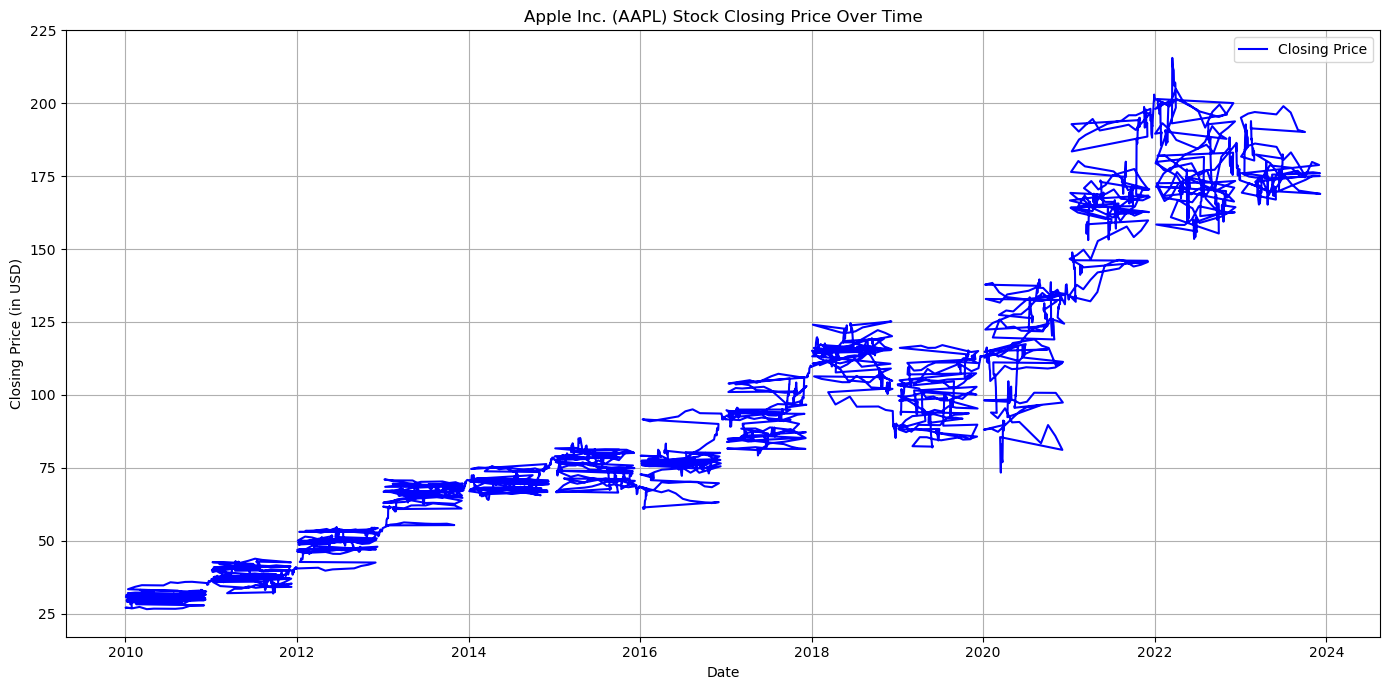

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(aapl_data['Date'], aapl_data['Close'], color='blue', label='Closing Price')
plt.title('Apple Inc. (AAPL) Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (in USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

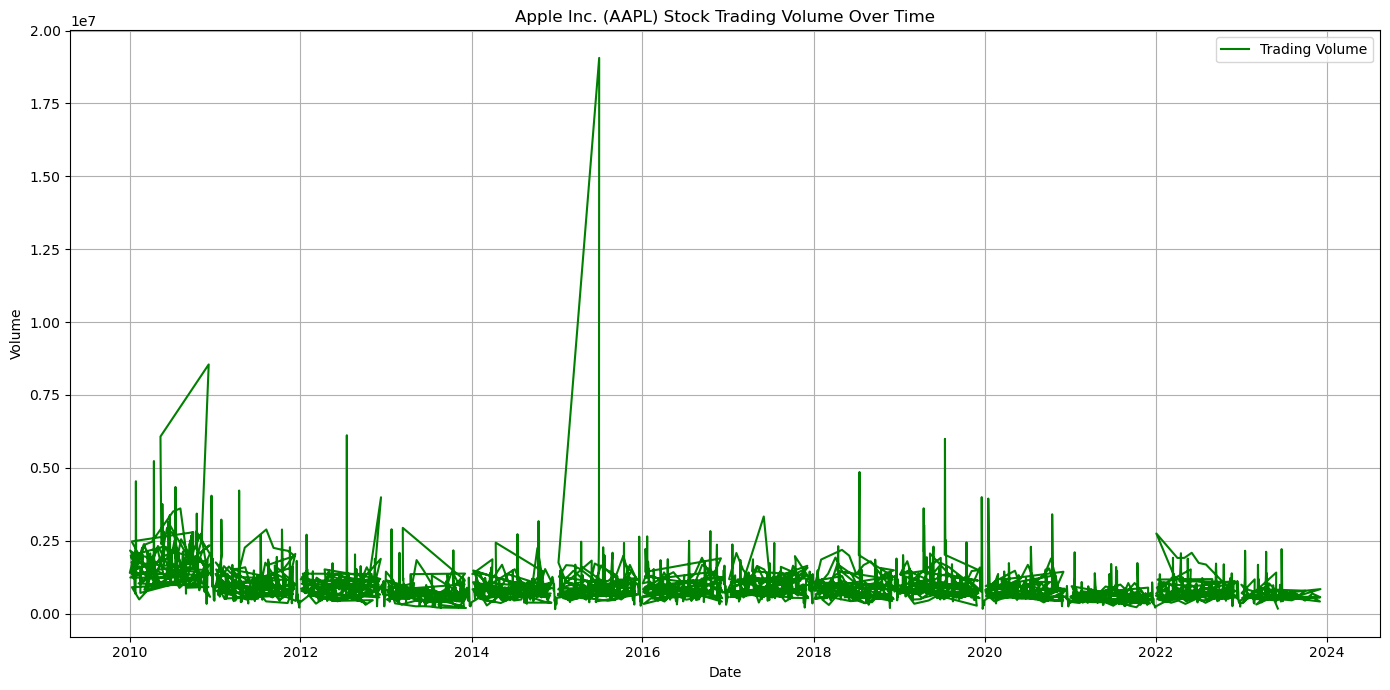

In [ ]:




plt.figure(figsize=(14, 7))
plt.plot(aapl_data['Date'], aapl_data['Volume'], color='green', label='Trading Volume')
plt.title('Apple Inc. (AAPL) Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
summary_stats = aapl_data[['Close', 'Volume']].describe()

summary_stats

,Close,Volume
count,3399.000000,3.399000e+03
mean,93.672539,9.298716e+05
std,46.328375,6.225883e+05
min,26.493113,1.519000e+05
25%,65.234386,5.929000e+05
50%,80.877342,7.947000e+05
75%,116.288986,1.088950e+06
max,215.566635,1.906230e+07


#### We can see that the apple data is stored as expected and displaying the correct graph. Now I'll use ipywidgets for all the visualization so I'tt give liberty. Also I'll output some of the stats

# Stats

In [ ]:
all_stats = []

all_files = os.listdir(output_directory)

print(len(all_files))

503


Here we iterate over all the directory files which are csv (chunks of over sp500), to see whats the basic statistics are like Average close, Media close etc. Theses are stats are listed below

In [ ]:
for file in all_files:
    if file.endswith('.csv'):
        filepath = os.path.join(output_directory, file)
        company_data = pd.read_csv(filepath)
        ticker = file[:-4]
        close_stats = company_data['Close'].describe()
        volume_stats = company_data['Volume'].describe()

        stats = {
            'Company': ticker,
            'Average_Close': close_stats['mean'],
            'Median_Close': close_stats['50%'],
            'Min_Close': close_stats['min'],
            'Max_Close': close_stats['max'],
            'Average_Volume': volume_stats['mean'],
            'Median_Volume': volume_stats['50%'],
            'Min_Volume': volume_stats['min'],
            'Max_Volume': volume_stats['max']
        }

        all_stats.append(stats)

In [ ]:
summary_df = pd.DataFrame(all_stats)

In [ ]:
summary_df.head()

,Company,Average_Close,Median_Close,Min_Close,Max_Close,Average_Volume,Median_Volume,Min_Volume,Max_Volume
0,A,62.827543,43.808224,17.431160,177.025680,2.971345e+06,2310100.0,271900.0,25368667.0
1,AAL,67.310050,54.425762,29.847603,146.694687,1.018918e+06,884700.0,99900.0,9764800.0
2,AAP,24.860057,20.910000,3.770965,56.988728,1.776176e+07,8997900.0,1158400.0,428617100.0
3,AAPL,93.672539,80.877342,26.493113,215.566635,9.298716e+05,794700.0,151900.0,19062300.0
4,ABBV,120.309316,130.224701,35.594917,230.368683,1.084406e+06,894500.0,130700.0,21832300.0


The below code will save the summary statics to the summary.csv and you can see it in the required directory

In [ ]:
summary_df.to_csv("summary.csv", index=False)

# Interactive visualization

This is the interactive visualization part, becuase instead of plotting graphs seperately in a simple form which make it messy and you can't keep record of it. So I use an interactive approach. Where you can select which part you company you want to visualize and it visualizes that for you

In [ ]:
def plot_company_data(ticker):
    company_data = pd.read_csv(os.path.join(output_directory, f'{ticker}.csv'))
    company_data['Date'] = pd.to_datetime(company_data['Date'], format='%d/%m/%Y')

    fig, ax1 = plt.subplots(figsize=(16, 8))
    ax1.plot(company_data['Date'], company_data['Close'], color='#1f77b4', label='Closing Price', linewidth=2)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Closing Price (in USD)', color='#1f77b4')
    ax1.tick_params(axis='y', labelcolor='#1f77b4')
    ax1.set_title(f'{ticker} Stock Data Over Time')
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
    max_close = company_data['Close'].max()
    min_close = company_data['Close'].min()
    ax1.annotate(f'Max: {max_close}', xy=(company_data['Date'][company_data['Close'].idxmax()], max_close),
                 xytext=(20,30), textcoords="offset points",
                 arrowprops=dict(arrowstyle="->", lw=1.5),
                 fontsize=9, color='#1f77b4')
    ax1.annotate(f'Min: {min_close}', xy=(company_data['Date'][company_data['Close'].idxmin()], min_close),
                 xytext=(20,-30), textcoords="offset points",
                 arrowprops=dict(arrowstyle="->", lw=1.5),
                 fontsize=9, color='#1f77b4')

    ax1.xaxis.set_major_locator(mdates.YearLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax1.xaxis.set_minor_locator(mdates.MonthLocator())

    ax2 = ax1.twinx()
    ax2.bar(company_data['Date'], company_data['Volume'], color='#2ca02c', alpha=0.3, label='Trading Volume')
    ax2.set_ylabel('Volume', color='#2ca02c')
    ax2.tick_params(axis='y', labelcolor='#2ca02c')

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.tight_layout()
    plt.show()

In [ ]:
ticker_modified_symbol = []

for file in all_files:
    if file.endswith(".csv"):
        ticker_modified_symbol.append(file.split(".")[0])


In [ ]:
ticker_dropdown = widgets.Dropdown(
    options=ticker_modified_symbol,
    value='AAPL',
    description='Company:',
    disabled=False
)

In [ ]:
widgets.interactive(plot_company_data, ticker=ticker_dropdown)

interactive(children=(Dropdown(description='Company:', index=3, options=('A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'A…

# Predicting the Future Data

## Checking if the heriustic rough set approach working fine or not

In [ ]:
apple_data = pd.read_csv(os.path.join('companies_data', "AAPL.csv"))
apple_data.head()

,Date,Close,Volume
0,04/01/2010,28.915880,1876000
1,05/01/2010,28.994598,2186900
2,06/01/2010,28.819681,1147200
3,07/01/2010,28.933376,1272400
4,08/01/2010,29.773031,2068200


In [ ]:
n_bins = 10
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
apple_data[['Close', 'Volume']] = discretizer.fit_transform(apple_data[['Close', 'Volume']])

apple_data.head()

,Date,Close,Volume
0,04/01/2010,0.0,9.0
1,05/01/2010,0.0,9.0
2,06/01/2010,0.0,7.0
3,07/01/2010,0.0,8.0
4,08/01/2010,0.0,9.0


In [ ]:
def create_lagged_features(df, lag_count=3):
    df_lagged = df.copy()
    for i in range(1, lag_count + 1):
        df_lagged[f"Close_Lag_{i}"] = df_lagged["Close"].shift(i)
        df_lagged[f"Volume_Lag_{i}"] = df_lagged["Volume"].shift(i)
    return df_lagged.dropna().reset_index(drop=True)

In [ ]:
lag_count = 3
apple_data_lagged = create_lagged_features(apple_data, lag_count)
apple_data_lagged.head()


,Date,Close,Volume,Close_Lag_1,Volume_Lag_1,Close_Lag_2,Volume_Lag_2,Close_Lag_3,Volume_Lag_3
0,07/01/2010,0.0,8.0,0.0,7.0,0.0,9.0,0.0,9.0
1,08/01/2010,0.0,9.0,0.0,8.0,0.0,7.0,0.0,9.0
2,11/01/2010,0.0,9.0,0.0,9.0,0.0,8.0,0.0,7.0
3,12/01/2010,0.0,8.0,0.0,9.0,0.0,9.0,0.0,8.0
4,13/01/2010,0.0,8.0,0.0,8.0,0.0,9.0,0.0,9.0


In [ ]:
def get_rules(data, n_bins):
    limits = pd.DataFrame(0, index=range(n_bins), columns=range(n_bins))

    for i in range(1, len(data)):
        prev_bin = int(data.iloc[i-1])
        curr_bin = int(data.iloc[i])
        limits.at[prev_bin, curr_bin] += 1


    limits = limits.div(limits.sum(axis=1), axis=0)
    return limits.fillna(0)


limits = get_rules(apple_data['Close'], n_bins)

limits

,0,1,2,3,4,5,6,7,8,9
0,0.964706,0.035294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.032353,0.950000,0.017647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.014706,0.905882,0.079412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.076471,0.894118,0.026471,0.002941,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.023599,0.941003,0.035398,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.002941,0.032353,0.908824,0.055882,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.052941,0.902941,0.044118,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041176,0.935294,0.023529,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020588,0.876471,0.102941
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100295,0.899705


In [ ]:
def predict_next_bin(current_bin, limits):
    return np.random.choice(limits.columns, p=limits.loc[current_bin].values)

def generate_predictions(initial_bin, limits, n_days):
    predictions = [initial_bin]
    for _ in range(n_days):
        next_bin = predict_next_bin(predictions[-1], limits)
        predictions.append(next_bin)
    return predictions


n_days = 252 * 5


initial_bin = int(apple_data['Close'].iloc[-1])
predicted_bins = generate_predictions(initial_bin, limits, n_days)

predicted_bins[:10]

[9, 9, 9, 9, 8, 8, 9, 9, 9, 9]

In [ ]:
bin_edges = discretizer.bin_edges_[0]
predicted_ranges = [(bin_edges[int(bin)], bin_edges[int(bin) + 1]) for bin in predicted_bins[:10]]

predicted_ranges

[(170.7268402, 215.5666351),
 (170.7268402, 215.5666351),
 (170.7268402, 215.5666351),
 (170.7268402, 215.5666351),
 (132.30180666, 170.7268402),
 (132.30180666, 170.7268402),
 (170.7268402, 215.5666351),
 (170.7268402, 215.5666351),
 (170.7268402, 215.5666351),
 (170.7268402, 215.5666351)]

## Moving towards our main dataset

In [ ]:
data_files = os.listdir('companies_data')
data_files

['A.csv',
 'AAL.csv',
 'AAP.csv',
 'AAPL.csv',
 'ABBV.csv',
 'ABC.csv',
 'ABT.csv',
 'ACGL.csv',
 'ACN.csv',
 'ADBE.csv',
 'ADI.csv',
 'ADM.csv',
 'ADP.csv',
 'ADSK.csv',
 'AEE.csv',
 'AEP.csv',
 'AES.csv',
 'AFL.csv',
 'AIG.csv',
 'AIZ.csv',
 'AJG.csv',
 'AKAM.csv',
 'ALB.csv',
 'ALGN.csv',
 'ALK.csv',
 'ALL.csv',
 'ALLE.csv',
 'AMAT.csv',
 'AMCR.csv',
 'AMD.csv',
 'AME.csv',
 'AMGN.csv',
 'AMP.csv',
 'AMT.csv',
 'AMZN.csv',
 'ANET.csv',
 'ANSS.csv',
 'AON.csv',
 'AOS.csv',
 'APA.csv',
 'APD.csv',
 'APH.csv',
 'APTV.csv',
 'ARE.csv',
 'ATO.csv',
 'ATVI.csv',
 'AVB.csv',
 'AVGO.csv',
 'AVY.csv',
 'AWK.csv',
 'AXON.csv',
 'AXP.csv',
 'AZO.csv',
 'BA.csv',
 'BAC.csv',
 'BALL.csv',
 'BAX.csv',
 'BBWI.csv',
 'BBY.csv',
 'BDX.csv',
 'BEN.csv',
 'BF-B.csv',
 'BG.csv',
 'BIIB.csv',
 'BIO.csv',
 'BK.csv',
 'BKNG.csv',
 'BKR.csv',
 'BLK.csv',
 'BMY.csv',
 'BR.csv',
 'BRK-B.csv',
 'BRO.csv',
 'BSX.csv',
 'BWA.csv',
 'BXP.csv',
 'C.csv',
 'CAG.csv',
 'CAH.csv',
 'CARR.csv',
 'CAT.csv',
 'CB.csv',

Enhanced preprocessing of the data to handle missing or infinite values.

In [ ]:
def enhanced_preprocess_data(df):
    df = df.fillna(method='ffill')
    df = df.fillna(method='bfill')
    for col in ['Close', 'Volume']:
        max_finite_value = df[df[col] != np.inf][col].max()
        df[col] = df[col].replace(np.inf, max_finite_value)

    return df

Generate the 1st, 15th, and 29th dates for the next 5 years.

In [ ]:
def generate_target_dates():
    start_date = datetime.now()
    end_date = start_date + timedelta(days=5*365)

    target_dates = []
    current_date = start_date

    while current_date <= end_date:
        if current_date.day in [4, 5,6,7,8,11,12,13,14,15,19,20,21,22,25,26,27,28,29]:
            target_dates.append(current_date.strftime('%Y-%m-%d'))
        current_date += timedelta(days=1)

    return target_dates

target_dates = generate_target_dates()

In [ ]:
def upper_lower_func(data, n_bins):

    upper_lower_lim = np.zeros((n_bins, n_bins), dtype=int)

    for i in range(1, len(data)):
        prev_bin = int(data.iloc[i-1])
        curr_bin = int(data.iloc[i])
        upper_lower_lim[prev_bin][curr_bin] += 1

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        upper_lower = upper_lower_lim / upper_lower_lim.sum(axis=1, keepdims=True)

    return pd.DataFrame(upper_lower)

Generate heuristic predictions using upper and lower limit, ensuring the number of predictions matches n_predictions.

In [ ]:
def adjusted_generate_predictions(initial_bin, upper_lower, n_predictions):
    predicted_bins = [initial_bin]

    for i in range(n_predictions - 1):
        next_bin_probs = upper_lower.iloc[int(predicted_bins[-1])]
        next_bin = np.random.choice(next_bin_probs.index, p=next_bin_probs.values)
        predicted_bins.append(next_bin)

    while len(predicted_bins) < n_predictions:
        predicted_bins.append(predicted_bins[-1])

    return predicted_bins[:n_predictions]

Final process for the company data to generate heuristic predictions for the specified target dates.

In [ ]:
def process_company_data_final(file_path, target_dates):


    company_data = pd.read_csv(file_path)
    company_data = enhanced_preprocess_data(company_data)


    company_data[['Close', 'Volume']] = discretizer.transform(company_data[['Close', 'Volume']])


    upper_lower_company = upper_lower_func(company_data['Close'], n_bins)


    initial_bin = int(company_data['Close'].iloc[-1])
    predicted_bins_company = adjusted_generate_predictions(initial_bin, upper_lower_company, len(target_dates))


    predicted_ranges_company = [(bin_edges[int(bin)], bin_edges[int(bin) + 1]) for bin in predicted_bins_company]


    df_predictions = pd.DataFrame({
        'Date': target_dates,
        'Predicted_Price_Range': predicted_ranges_company
    })
    df_predictions['Company'] = os.path.basename(file_path).replace(".csv", "")

    return df_predictions

Inspecting for the first company

In [ ]:

sample_file_path = os.path.join('companies_data', data_files[0])
sample_data = pd.read_csv(sample_file_path)
sample_data = enhanced_preprocess_data(sample_data)
sample_data[['Close', 'Volume']] = discretizer.transform(sample_data[['Close', 'Volume']])
upper_lower_sample = upper_lower_func(sample_data['Close'], n_bins)
initial_bin_sample = int(sample_data['Close'].iloc[-1])
predicted_bins_sample = adjusted_generate_predictions(initial_bin_sample, upper_lower_sample, len(target_dates))

len(target_dates), len(predicted_bins_sample), upper_lower_sample


(1137,
 1137,
           0         1         2         3         4         5         6  \
 0  0.972635  0.027365  0.000000  0.000000  0.000000  0.000000  0.000000   
 1  0.060823  0.937388  0.001789  0.000000  0.000000  0.000000  0.000000   
 2  0.000000  0.000000  0.954338  0.045662  0.000000  0.000000  0.000000   
 3  0.000000  0.000000  0.134328  0.753731  0.111940  0.000000  0.000000   
 4  0.000000  0.000000  0.006452  0.083871  0.877419  0.032258  0.000000   
 5  0.000000  0.000000  0.000000  0.000000  0.042553  0.904255  0.053191   
 6  0.000000  0.000000  0.000000  0.000000  0.000000  0.047619  0.940476   
 7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 8  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 9  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 
           7         8         9  
 0  0.000000  0.000000  0.000000  
 1  0.000000  0.000000  0.000000  
 2  0.000000  0.000000  0.000000  
 3  0.00

In [ ]:
sample_data.columns

Index(['Date', 'Close', 'Volume'], dtype='object')

In [ ]:

df_all_predictions_final = pd.concat([process_company_data_final(os.path.join('companies_data', file), target_dates) for file in data_files])


In [ ]:

df_pivot = df_all_predictions_final.pivot(index='Date', columns='Company', values='Predicted_Price_Range')
df_pivot = df_pivot.reset_index()
output_pivot_file_path = "predicted_forecast.csv"
df_pivot.to_csv(output_pivot_file_path, index=False)

In [ ]:
output_pivot_file_path

'predicted_forecast.csv'